<a href="https://colab.research.google.com/github/mikeninerbravog/FacialReconPOC1/blob/master/POC_reconhecimentoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POC - Prova de Conceito sobre Reconhecimento Facial utilizando TensorFlow, numpy, matplotlib, cv2 e face_recognition

Aluno Marcello S Bastos - Bootcamp BairesDev - Machine Learning Practitioner - Fevereiro 2025

In [6]:
# Importação das bibliotecas necessárias
import tensorflow as tf

# NumPy: Biblioteca para operações matemáticas e manipulação de arrays.
import numpy as np

# Matplotlib: Utilizada para exibir imagens e gráficos.
import matplotlib.pyplot as plt

# OpenCV: Biblioteca de visão computacional usada para manipulação e processamento de imagens e vídeos.
import cv2

# OS: Módulo para manipulação de arquivos e diretórios do sistema operacional.
import os

# Google Colab: Biblioteca para upload e download de arquivos dentro do ambiente do Google Colab.
from google.colab import files

In [7]:
!pip install face_recognition

# Face Recognition: Biblioteca especializada em detecção e reconhecimento facial baseada no dlib.
import face_recognition


In [8]:
# Baixar e carregar um modelo pré-treinado para extração de embeddings
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# Criar diretório para armazenar imagens do Rocky III
if not os.path.exists("rocky_iii_faces"):
    os.makedirs("rocky_iii_faces")

# Função para carregar e processar a imagem
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Função para extrair embeddings faciais
def get_embedding(img_path):
    img_array = preprocess_image(img_path)
    embedding = model.predict(img_array)
    return embedding.flatten()

# Função para comparar um rosto novo com o banco de imagens
def recognize_face(test_img_path, dataset_embeddings):
    test_embedding = get_embedding(test_img_path)
    min_dist = float("inf")
    identity = "Desconhecido"

    for name, emb in dataset_embeddings.items():
        dist = np.linalg.norm(test_embedding - emb)
        if dist < min_dist:
            min_dist = dist
            identity = name

    return identity, min_dist

# Upload de imagens dos personagens
print("Faça o upload das imagens do Rocky III (nomes dos arquivos devem corresponder ao personagem).")
rocky_iii_files = files.upload()

# Criar dicionário de embeddings
dataset_embeddings = {}
for img_name in rocky_iii_files.keys():
    img_path = f"rocky_iii_faces/{img_name}"
    with open(img_path, "wb") as f:
        f.write(rocky_iii_files[img_name])
    dataset_embeddings[img_name.split('.')[0]] = get_embedding(img_path)

<ipython-input-8-07b203cf0ea9>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Faça o upload das imagens do Rocky III (nomes dos arquivos devem corresponder ao personagem).


Saving rocky.jpg to rocky (1).jpg
Saving Adrian.png to Adrian (1).png
Saving clubber.png to clubber (1).png
Saving apollo.png to apollo (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Faça o upload de uma imagem para testar o reconhecimento.


Saving MV5BMTAxODAzMzc5NTdeQTJeQWpwZ15BbWU3MDE4NDg2NjQ@._V1_FMjpg_UX1000_.jpg to MV5BMTAxODAzMzc5NTdeQTJeQWpwZ15BbWU3MDE4NDg2NjQ@._V1_FMjpg_UX1000_ (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


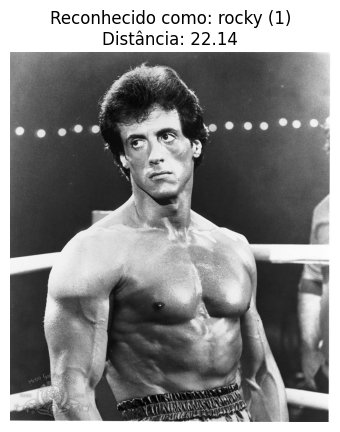

In [9]:
# Upload de imagem de teste para reconhecimento
print("Faça o upload de uma imagem para testar o reconhecimento.")
test_file = files.upload()
test_img_path = list(test_file.keys())[0]

# Realizar reconhecimento
identity, distance = recognize_face(test_img_path, dataset_embeddings)

# Exibir resultado
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(f"Reconhecido como: {identity}\nDistância: {distance:.2f}")
plt.show()